# Pymaceuticals Inc.
---

### Analysis

Data from a total of 248 unique mice treated with one of four novel drug regimens (i.e., Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Propriva, Ramicane, Stelasyn, Zoniferol) or with Placebo over a period of up to 45 weeks (or death), whichever came first, was analysed to understand the impact of the novel drug on cancerous tumor growth in mm3. One duplicated observation was noted, and was dropped from all subsequent analyses.

The number of mice treated within each treatment arm varied from a high of 230 for the Capomulin treatment arm to a low of 148 for the Propriva treatment arm. Unusually for drug treatment trials of this nature there was a relatviely equal proportion of male (51.0%) to female (49.0%) mice.



#### Treatment Response Between Treatment Arms:
The average size of tumor growth in mice treated in the Capomulin treatment arm was Capomulin 40.6. This was similar to the median size of 41.6, suggesting the data were approximately normally ditributed. Average tumor growth for the Capomulin treatment arm was lower than for other active treatment arms with the exception of the Ramicane treatment arm (mean: 40.2, median: 40.7). 

Variance around the mean was also relatively small for the Capomulin treatment arm (24.9), suggesting that all mice assigned to this treatment arm experienced relatively similar treatment response. Variance around the mean was also relateively small for the Ramicane treatment arm (23.4), again suggesting that mice treated with this drug regimen expereicned relatively similar treatment responses. Variance was notably higher for a number of other drug regimens (e.g., Ketapril, Naftisol) as well as Placebo suggesting that mice in these drug regimens experienced varied treatment responses. There was evidence of a single outlier response in the Infubinol treatment arm. 


#### Overall Summary of Treatment Response in the Capomulin Treatment Arm:
Overall, there is evidence that:
* Mice treated in the Capomulin arm experienced a decrease in tumor volume (mm3) over time.
* There was a relatviely strong positive correlation between mouse weight and tumor volume (mm3) (Pearson Correlation Coefficient: 0.88).
* Linear regression which further indicated that, for each one-unit increase in mouse weight in grams, there is a predicted increase of 1.75 in tumour volume (mm3), holding all other covariates constant.
* The r-squared value for this regression model was 0.77 suggesting that this relatively simple model nevertheless explains 77% of the variance in tumor growth within the Capomulin treatment arm.
* Overall, Capomulin would appear to be a promising treatment in reducing tumor volume (mm3) in a murine model.







In [1]:
# Dependencies and Setup
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mice_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_mice_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
tot_mice = len(merged_mice_results["Mouse ID"].unique())
print(tot_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_mice_results[merged_mice_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_mice_results[merged_mice_results['Mouse ID'].isin(duplicate_rows['Mouse ID'])]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_data = merged_mice_results[~merged_mice_results["Mouse ID"].isin(duplicate_rows["Mouse ID"])]


In [16]:
# Checking the number of mice in the clean DataFrame.
tot_mice_unique = len(unique_mice_data["Mouse ID"].unique())
print(tot_mice_unique)


248


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = unique_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = unique_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = unique_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = unique_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = unique_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_one = pd.DataFrame({"mean" : mean, "median": median, "var": var, "std" : std, "sem": sem})
summary_stats_one

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = unique_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats_two = pd.DataFrame(summary_stats_agg)
summary_stats_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


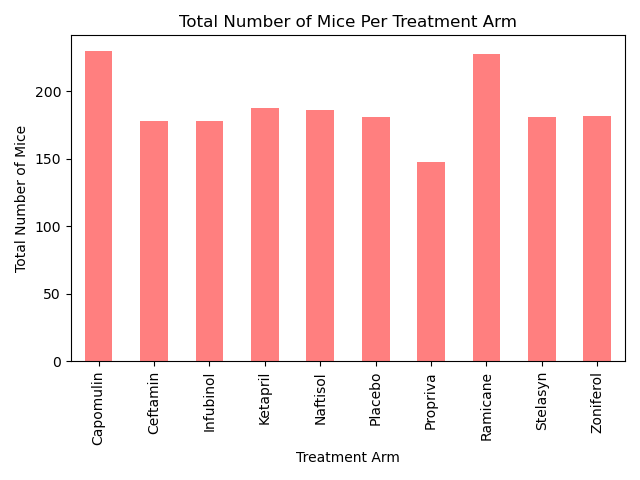

In [115]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_treatment = unique_mice_data.groupby("Drug Regimen")["Mouse ID"].count()
print(mice_per_treatment)

plt.figure()
pandas_bar_chart = mice_per_treatment.plot(kind="bar", color="red", alpha=.5, title="Total Number of Mice Per Treatment Arm", xlabel="Treatment Arm", ylabel="Total Number of Mice")
plt.tight_layout()
plt.savefig("images/Bar Plot - Mice Per Treatment Arm - PANDAS PLOT.png")

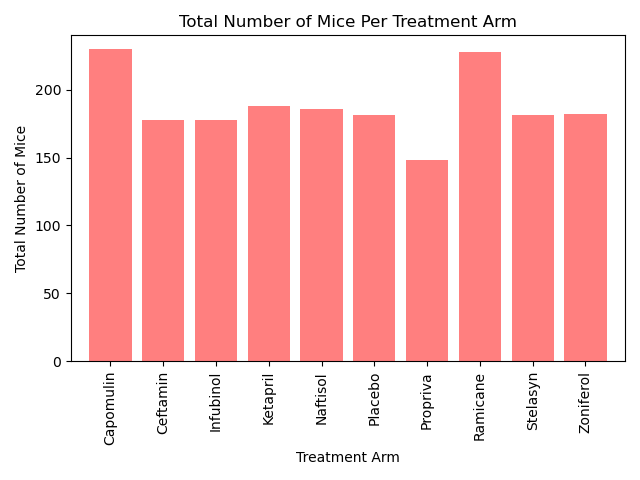

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
treatment_arms = mice_per_treatment.index
tick_locations = np.arange(len(mice_per_treatment))

plt.figure()
plt.bar(tick_locations, mice_per_treatment.values, color="red", alpha=0.5, align="center")
plt.xticks(tick_locations, treatment_arms, rotation='vertical')
plt.xlim(-0.75, len(tick_locations)-0.25)
plt.ylim(0, max(mice_per_treatment.values) + 10)
plt.title("Total Number of Mice Per Treatment Arm")
plt.xlabel("Treatment Arm")
plt.ylabel("Total Number of Mice")
plt.tight_layout()
plt.savefig("images/Bar Plot - Mice Per Treatment Arm - PYPLOT.png")
plt.show()

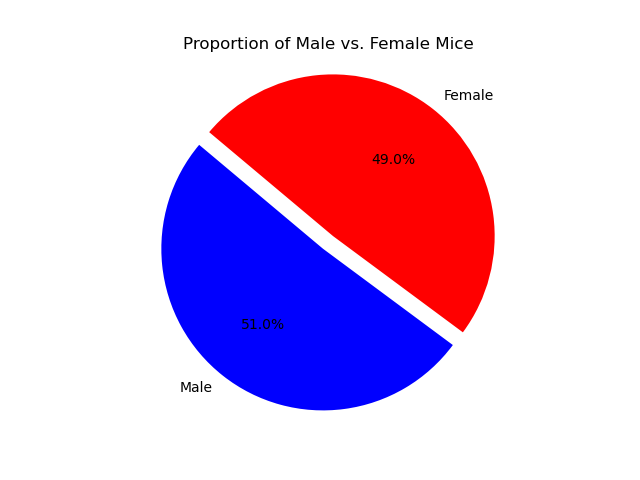

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = unique_mice_data["Sex"].value_counts()

plt.figure()
mice_sex.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["blue", "red"], shadow=False, explode=(0.1, 0))
plt.title("Proportion of Male vs. Female Mice")
plt.ylabel(" ")
plt.axis("equal")
plt.savefig("images/Pie Chart - Mice Sex - PANDAS.png")
plt.show()

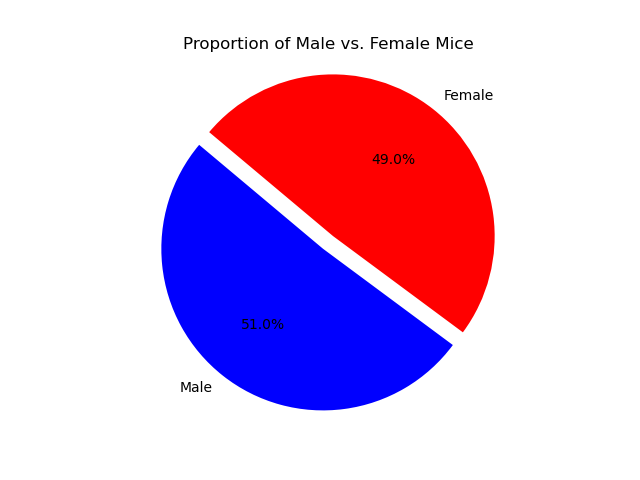

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure()
labels = mice_sex.index
colors = ["blue", "red"]
explode = (0.1, 0)
plt.pie(mice_sex, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140, shadow=False, explode=explode)
plt.title("Proportion of Male vs. Female Mice")
plt.axis("equal")
plt.savefig("images/Pie Chart - Mice Sex - PYPLOT.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_obs_per_mouse = unique_mice_data.groupby("Mouse ID")
last_obs_per_mouse = last_obs_per_mouse["Timepoint"].max()
last_obs_per_mouse = pd.DataFrame(last_obs_per_mouse)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_obs_per_mouse = pd.merge(last_obs_per_mouse, unique_mice_data, on=["Mouse ID", "Timepoint"])
merged_last_obs_per_mouse.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_arms_list = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty lists to store tumor volume data subsets for each treatment arm
tumor_vol_data_per_treatment = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_arms_list:
    # Locate the rows which contain mice for the current treatment arm and get the tumor volumes
    tumor_vol = merged_last_obs_per_mouse.loc[merged_last_obs_per_mouse["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the subset of tumor volume data to the corresponding list
    tumor_vol_data_per_treatment[treatment] = tumor_vol
    
    # Calculate quartiles and IQR
    quartiles = tumor_vol.quantile([.25, .5, .75])
    Q1 = quartiles[.25]
    median = quartiles[.5]
    Q3 = quartiles[.75]
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print results
    print(f"--- {treatment} ---")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Potential outliers: {outliers}")


--- Ramicane ---
IQR: 9.10
Lower Bound: 17.91
Upper Bound: 54.31
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--- Capomulin ---
IQR: 7.78
Lower Bound: 20.70
Upper Bound: 51.83
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--- Infubinol ---
IQR: 11.48
Lower Bound: 36.83
Upper Bound: 82.74
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
--- Ceftamin ---
IQR: 15.58
Lower Bound: 25.36
Upper Bound: 87.67
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


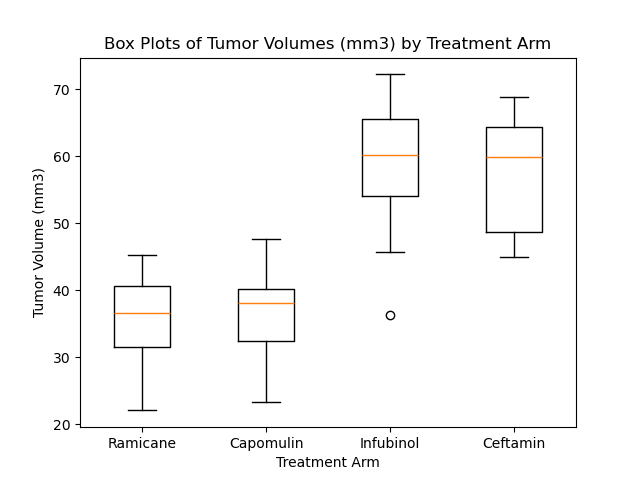

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure()
plt.boxplot(tumor_vol_data_per_treatment.values(), labels=treatment_arms_list)
plt.title("Box Plots of Tumor Volumes (mm3) by Treatment Arm")
plt.xlabel("Treatment Arm")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.savefig("images/Box Plots - Ramicane Capomulin Infubinol Ceftamin.png")
plt.show()
    

## Line and Scatter Plots

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# First, find out the Mouse IDs of the mice treated in the Capomulin treatment arm
capomulin_arm = merged_last_obs_per_mouse.loc[merged_last_obs_per_mouse["Drug Regimen"] == "Capomulin"]
capomulin_mice_ids = capomulin_arm["Mouse ID"].unique()
print(f"IDs of the mice treated in the Capomulin treatment arm: {capomulin_mice_ids}")

IDs of the mice treated in the Capomulin treatment arm: ['b128' 'b742' 'f966' 'g288' 'g316' 'i557' 'i738' 'j119' 'j246' 'l509'
 'l897' 'm601' 'm957' 'r157' 'r554' 'r944' 's185' 's710' 't565' 'u364'
 'v923' 'w150' 'w914' 'x401' 'y793']


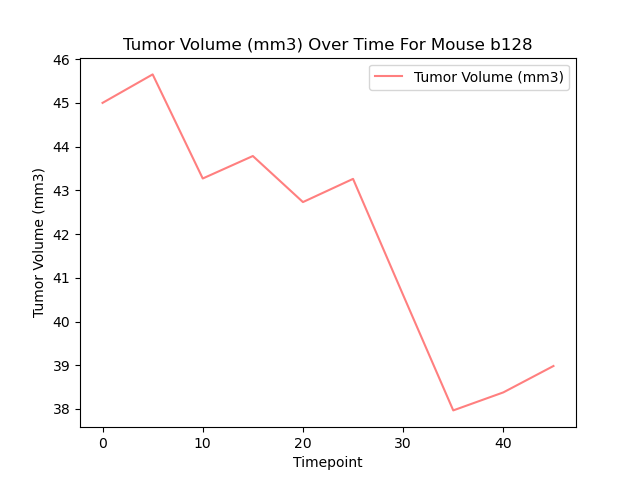

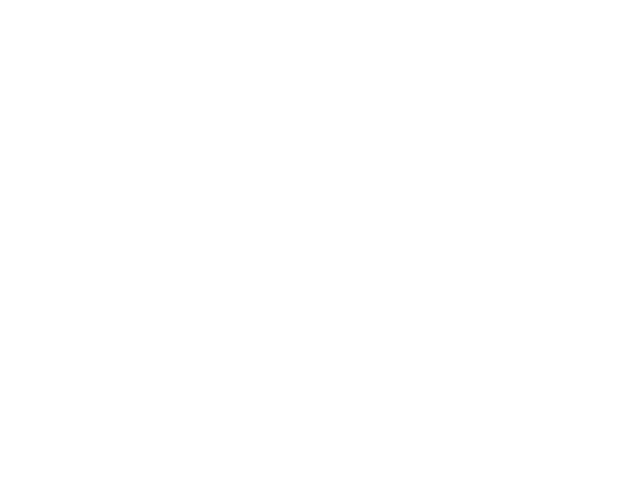

In [70]:
# Now, create a line plot of tumor volume vs. time point for the first mouse treated with Capomulin (b128)
b128 = unique_mice_data.loc[unique_mice_data["Mouse ID"] == "b128"]

plt.figure()
b128.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", color="red", alpha=0.5)
plt.title("Tumor Volume (mm3) Over Time For Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.savefig("images/Line Plot - Tumor Volume Over Time Mouse b128.png")
plt.show()


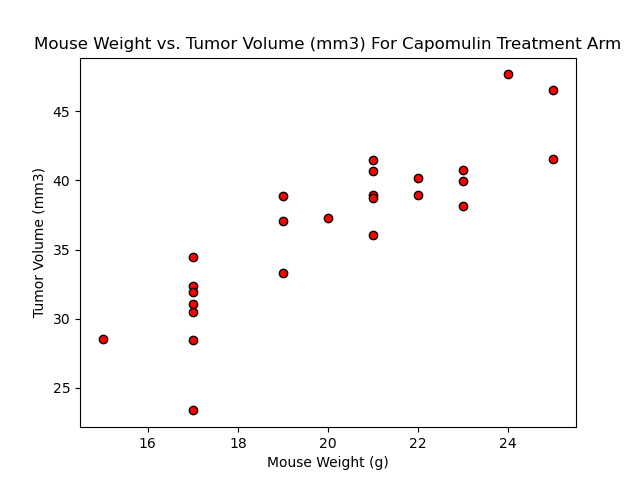

In [117]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_capomulin = capomulin_arm["Weight (g)"]
tumor_vol_capomulin = capomulin_arm["Tumor Volume (mm3)"]

plt.figure()
plt.scatter(weight_capomulin, tumor_vol_capomulin, facecolors = "red", edgecolors = "black")
plt.title("Mouse Weight vs. Tumor Volume (mm3) For Capomulin Treatment Arm")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.savefig("images/Scatter Plot - Mouse Weight vs. Tumor Volume Capomulin Regimen.png")
plt.show()

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(weight_capomulin, tumor_vol_capomulin)
print(f"The Pearson correlation coefficent for mouse weight and tumor volume (mm3) for the Capomulin treatment arm is: {round(correlation[0],2)}")

The Pearson correlation coefficent for mouse weight and tumor volume (mm3) for the Capomulin treatment arm is: 0.88


In [101]:
# Calculate a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight_capomulin, tumor_vol_capomulin)
regress_values = weight_capomulin * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"--- Capomulin Treatment Arm ---")
print(f"Slope: {round(slope,2)}")
print(f"Standard Error of the Slope: {round(stderr,2)}")
print(f"Intercept: {round(intercept,2)}")
print(f"p-value: {round(pvalue,3)}")
print(f"r-squared is {round((rvalue**2),2)}")

--- Capomulin Treatment Arm ---
Slope: 1.75
Standard Error of the Slope: 0.2
Intercept: 1.45
p-value: 0.0
r-squared is 0.77


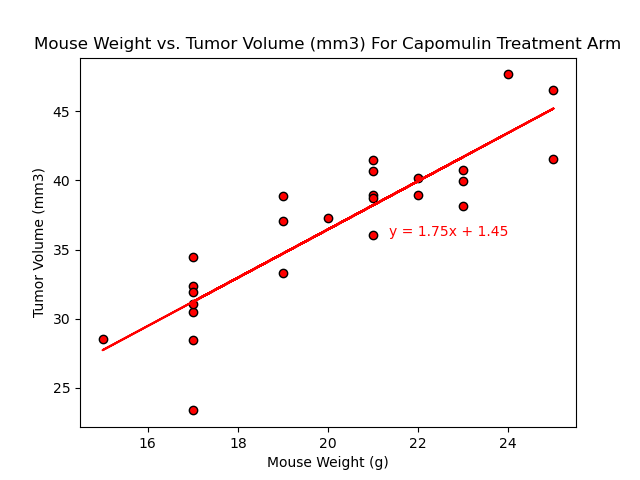

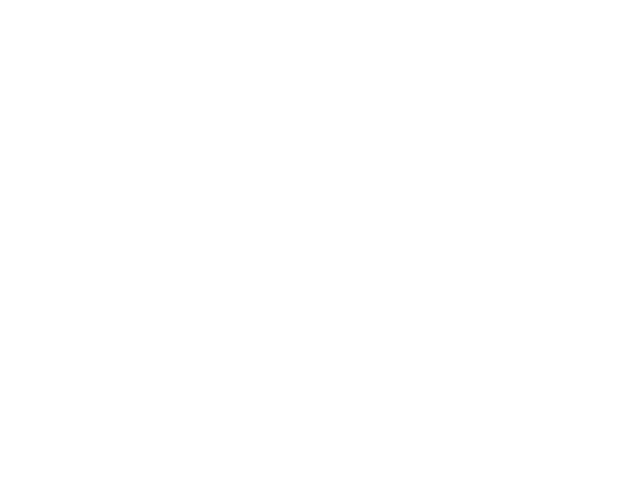

In [116]:
# Adding the regression line and equation to the scatter plot

plt.figure()
plt.figure()
plt.scatter(weight_capomulin, tumor_vol_capomulin, facecolors = "red", edgecolors = "black")
plt.plot(weight_capomulin, regress_values, "r-")
plt.annotate(line_eq, xy=(24,36), color="red", fontsize=10, horizontalalignment="right")
plt.title("Mouse Weight vs. Tumor Volume (mm3) For Capomulin Treatment Arm")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.savefig("images/Regression Plot - Mouse Weight vs. Tumor Volume Capomulin Regimen.png")
plt.show()